In [1050]:
import pandas as pd

train = pd.read_csv('inputs/train.csv')
test = pd.read_csv('inputs/test.csv')

In [942]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [943]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [944]:
train.shape

(891, 12)

In [945]:
test.shape

(418, 11)

In [946]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [947]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [948]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [949]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [950]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

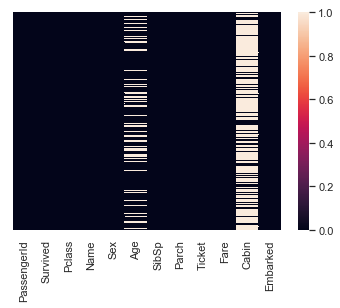

In [951]:
sns.heatmap(train.isnull(), yticklabels =False)

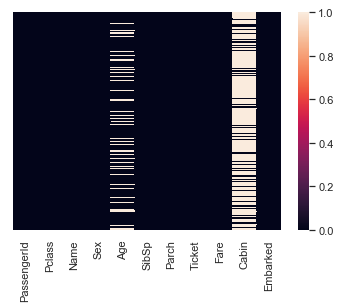

In [952]:
sns.heatmap(test.isnull(), yticklabels = False)

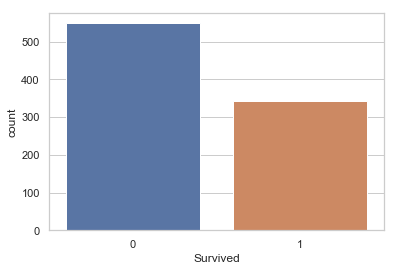

In [953]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train)

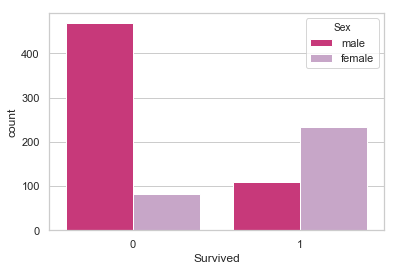

In [954]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue ='Sex', data = train, palette = 'PuRd_r')

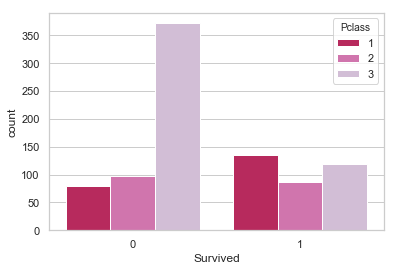

In [955]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue ='Pclass', data = train, palette = 'PuRd_r')

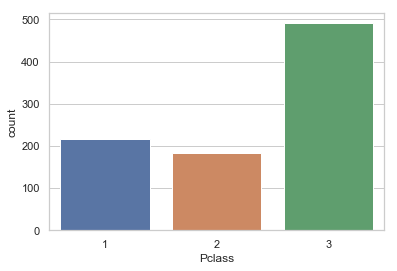

In [956]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data = train)

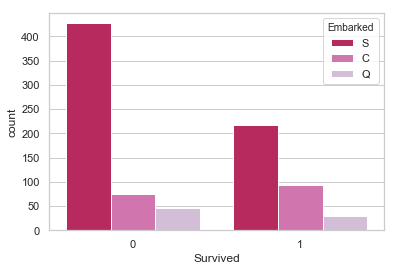

In [957]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue ='Embarked', data = train, palette = 'PuRd_r')

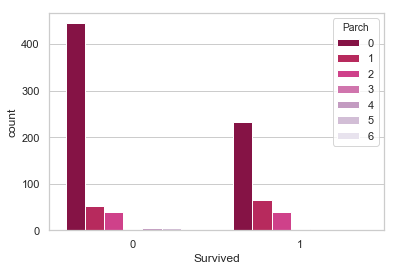

In [958]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue ='Parch', data = train, palette = 'PuRd_r')

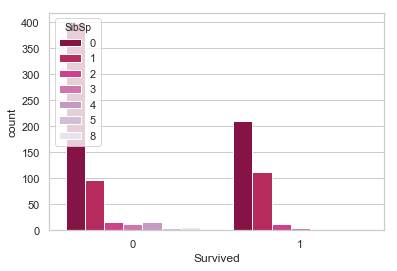

In [959]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue ='SibSp', data = train, palette = 'PuRd_r')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


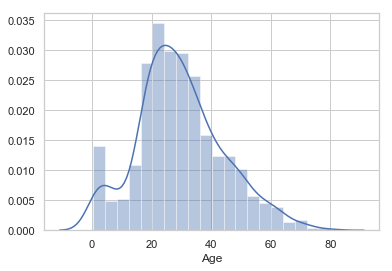

In [960]:
sns.distplot(train['Age'].dropna())

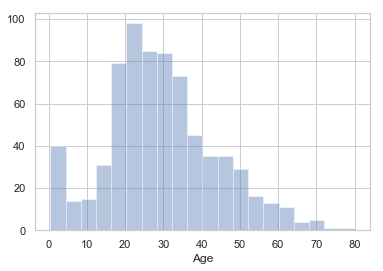

In [961]:
sns.distplot(train['Age'].dropna(), kde=False)

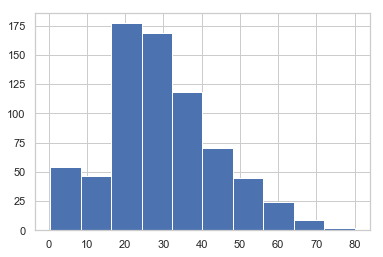

In [962]:
train['Age'].hist()

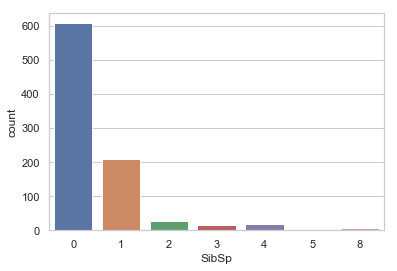

In [963]:
sns.countplot(x='SibSp', data=train)

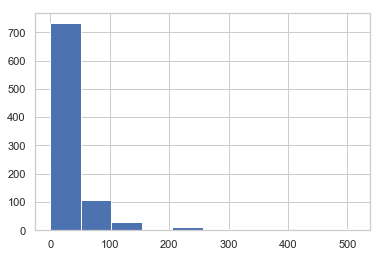

In [964]:
train['Fare'].hist(bins=10)

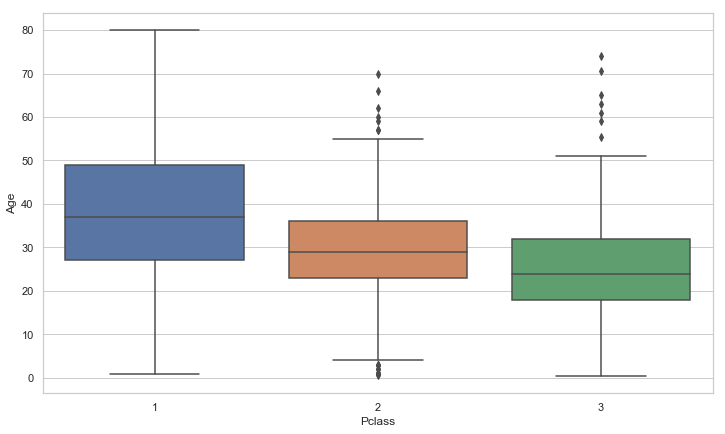

In [965]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train) # we want to remove age cos it has missing values. bt how does it relate with pclass(major dactor)

In [966]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [967]:
train['Age']= train[['Age', 'Pclass']].apply(input_age, axis=1) # apply the function to each  row

In [968]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [969]:
train.drop('Cabin', axis=1, inplace =True)

In [970]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [971]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [972]:
 #train.dropna(inplace=True)- Will reduce row entries hence the accuracy

In [973]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [974]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [975]:
embark_val = pd.get_dummies(train['Embarked'])
sex_val = pd.get_dummies(train['Sex'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [976]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace = True)

In [977]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [978]:
train.drop(['PassengerId'], axis=1, inplace = True)

In [979]:
train = pd.concat([train, sex_val, embark_val], axis=1)

In [980]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [981]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [982]:
train.shape

(891, 11)

In [983]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [984]:
test.shape

(418, 11)

In [985]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [986]:
test.drop(['Name', 'Ticket','Cabin'], axis=1, inplace = True)

In [987]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


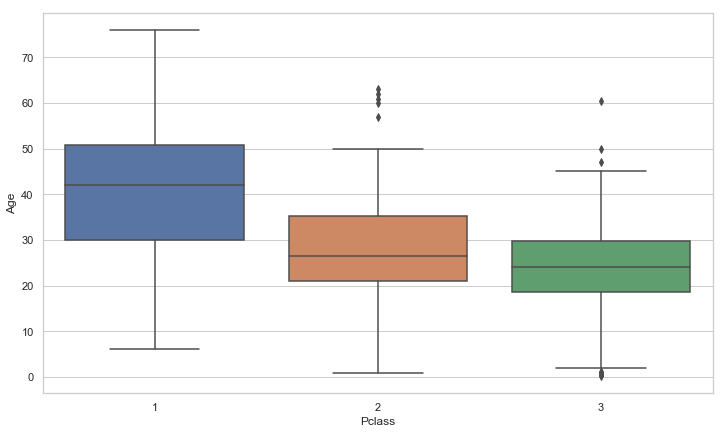

In [988]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=test) # we want to remove age cos it has missing values. bt how does it relate with pclass(major dactor)

In [989]:
def input_age2(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age

In [990]:
test['Age']= test[['Age', 'Pclass']].apply(input_age2, axis=1) # apply the function to each  row

In [991]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

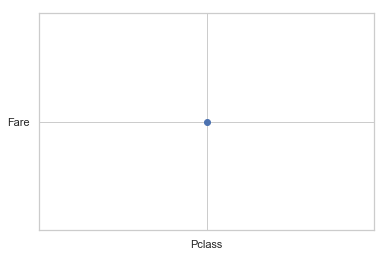

In [992]:
plt.scatter('Pclass', 'Fare')
plt.show()

In [993]:
#test.dropna(inplace=True)- it will eliminate 1 row, submission file must have 418 rows. 

In [994]:
test.shape

(418, 8)

In [1041]:
train.shape

(891, 10)

In [1043]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
Fare           0
female         0
male           0
C              0
Q              0
S              0
FamilySize     0
dtype: int64

In [996]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [997]:
embark_val = pd.get_dummies(test['Embarked'])
sex_val = pd.get_dummies(test['Sex'])

In [998]:
#test.drop(['Sex', 'Embark'], axis=1, inplace = True)

In [999]:
test = pd.concat([test, sex_val, embark_val], axis=1)

In [1000]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,0,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,1,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,1,0,0,0,1


In [1001]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [1002]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,0,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,1,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,1,0,0,0,1


In [1003]:
test.drop(['Sex','Embarked'], axis=1, inplace = True)

In [1004]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [1005]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [1006]:
train.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
female      0
male        0
C           0
Q           0
S           0
dtype: int64

In [1007]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [1008]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,24.0,0,0,8.4583,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,1,3,27.0,0,2,11.1333,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,1,0,0


In [1009]:
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [1010]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,0.0,0,1,0,0,1
1,1,1,38.0,1,0,2.0,1,0,1,0,0
2,1,3,26.0,0,0,0.0,1,0,0,0,1
3,1,1,35.0,1,0,2.0,1,0,0,0,1
4,0,3,35.0,0,0,0.0,0,1,0,0,1


In [1011]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,0.0,0,1,0,1,0
1,893,3,47.0,1,0,0.0,1,0,0,0,1
2,894,2,62.0,0,0,0.0,0,1,0,1,0
3,895,3,27.0,0,0,0.0,0,1,0,0,1
4,896,3,22.0,1,1,0.0,1,0,0,0,1


In [1012]:
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [1013]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,2.0,0,0,0.0,0,1,0,1,0
1,893,3,3.0,1,0,0.0,1,0,0,0,1
2,894,2,3.0,0,0,0.0,0,1,0,1,0
3,895,3,2.0,0,0,0.0,0,1,0,0,1
4,896,3,1.0,1,1,0.0,1,0,0,0,1


In [1014]:
test.shape

(418, 11)

In [1015]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,1.0,1,0,0.0,0,1,0,0,1
1,1,1,3.0,1,0,2.0,1,0,1,0,0
2,1,3,1.0,0,0,0.0,1,0,0,0,1
3,1,1,2.0,1,0,2.0,1,0,0,0,1
4,0,3,2.0,0,0,0.0,0,1,0,0,1


In [1016]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

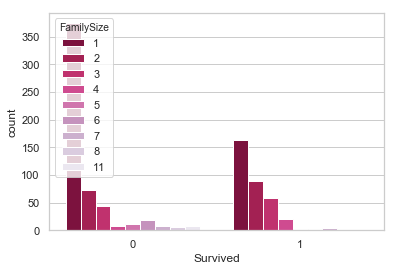

In [1017]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue ='FamilySize', data = train, palette = 'PuRd_r')

In [1018]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [1019]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,FamilySize
0,0,3,1.0,1,0,0.0,0,1,0,0,1,0.4
1,1,1,3.0,1,0,2.0,1,0,1,0,0,0.4
2,1,3,1.0,0,0,0.0,1,0,0,0,1,0.0
3,1,1,2.0,1,0,2.0,1,0,0,0,1,0.4
4,0,3,2.0,0,0,0.0,0,1,0,0,1,0.0


In [1020]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,FamilySize
0,892,3,2.0,0,0,0.0,0,1,0,1,0,0.0
1,893,3,3.0,1,0,0.0,1,0,0,0,1,0.4
2,894,2,3.0,0,0,0.0,0,1,0,1,0,0.0
3,895,3,2.0,0,0,0.0,0,1,0,0,1,0.0
4,896,3,1.0,1,1,0.0,1,0,0,0,1,0.8


In [1021]:
features_drop = ['SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [1022]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

In [1023]:
train_data.head()

,Pclass,Age,Fare,female,male,C,Q,S,FamilySize
0,3,1.0,0.0,0,1,0,0,1,0.4
1,1,3.0,2.0,1,0,1,0,0,0.4
2,3,1.0,0.0,1,0,0,0,1,0.0
3,1,2.0,2.0,1,0,0,0,1,0.4
4,3,2.0,0.0,0,1,0,0,1,0.0


In [1024]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [1025]:
test.head()

,PassengerId,Pclass,Age,Fare,female,male,C,Q,S,FamilySize
0,892,3,2.0,0.0,0,1,0,1,0,0.0
1,893,3,3.0,0.0,1,0,0,0,1,0.4
2,894,2,3.0,0.0,0,1,0,1,0,0.0
3,895,3,2.0,0.0,0,1,0,0,1,0.0
4,896,3,1.0,0.0,1,0,0,0,1,0.8


In [1026]:
train.head()

,Survived,Pclass,Age,Fare,female,male,C,Q,S,FamilySize
0,0,3,1.0,0.0,0,1,0,0,1,0.4
1,1,1,3.0,2.0,1,0,1,0,0,0.4
2,1,3,1.0,0.0,1,0,0,0,1,0.0
3,1,1,2.0,2.0,1,0,0,0,1,0.4
4,0,3,2.0,0.0,0,1,0,0,1,0.0


In [1027]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [1028]:
#cross validation(K-fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [1029]:
#KNN
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.7752809  0.7752809  0.80898876 0.85393258 0.79775281
 0.7752809  0.78651685 0.7752809  0.78651685]


In [1030]:
# kNN Score
round(np.mean(score)*100, 2)

79.13

In [1031]:
#DECISION TREE 
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.82022472 0.80898876 0.78651685 0.86516854 0.82022472
 0.79775281 0.80898876 0.73033708 0.83146067]


In [1032]:
round(np.mean(score)*100, 2)

80.92

In [1033]:
#RANDOM FOREST 
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.86516854 0.7752809  0.76404494 0.86516854 0.83146067
 0.80898876 0.79775281 0.74157303 0.83146067]


In [1034]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.81

In [1035]:
#NAIVE BAYES
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.7752809  0.74157303 0.76404494 0.73033708 0.7752809
 0.7752809  0.83146067 0.83146067 0.79775281]


In [1036]:
#NAIVE BAYES
round(np.mean(score)*100, 2)

78.45

In [1037]:
#SVM
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.81111111 0.79775281 0.79775281 0.78651685 0.84269663 0.78651685
 0.78651685 0.85393258 0.84269663 0.83146067]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [1038]:
round(np.mean(score)*100,2)

81.37

In [1045]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
female        891 non-null uint8
male          891 non-null uint8
C             891 non-null uint8
Q             891 non-null uint8
S             891 non-null uint8
FamilySize    891 non-null float64
dtypes: float64(3), int64(2), uint8(5)
memory usage: 39.2 KB


In [1046]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [1047]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [1048]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1049]:
submission.shape

(418, 2)